#**Indian Startup Funding Analysic-Explortory Data Analysis**

##Project Overview

**Goal-** Analyze India's startup funding ecosystem through comprehensive **EDA to Extract** actionable business insights for investors,enterpreneurs and policymakers

**DataSet -** Indian Unicorns Startups 2023(102 companies with $1B+valuations)

##Loading and First Look

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

##Load the Dataset

In [50]:
df=pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv')

##Basic Dataset information

In [51]:
df.shape

(102, 8)

In [52]:
df.columns.tolist()

['No.',
 'Company',
 'Sector',
 'Entry Valuation^^ ($B)',
 'Valuation ($B)',
 'Entry',
 'Location',
 'Select Investors']

In [53]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


##Data Quality Assessement

###Check data types and missing values

In [54]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object


In [55]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


###Check for Duplicates

In [56]:
df.duplicated().sum()

np.int64(0)

###Basic statistic

In [57]:
df.describe()

,No.,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


**Key Insights To Discuss**

* DataSet contains of 102 Indian Unions Startups
* No missing Values(no duplicates/clean dataset)
* Mix Dates span from 2011 to 2022

##Data Preprocessing

###Clean columns names


In [58]:
df.columns = df.columns.str.strip()

###Convert Entry Columns To datetime

In [59]:
df['Entry_Date'] = pd.to_datetime(df['Entry'], format='%b/%Y')
df['Entry_Year'] = df['Entry_Date'].dt.year
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015


In [60]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object
Entry_Date,datetime64[ns]
Entry_Year,int32


###Create valuations growth metrics

In [61]:
df['Valuation_Growth'] =df['Valuation ($B)'] /df['Entry Valuation^^ ($B)']
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765


###Extract Primary city(before '/')

In [62]:
df['Primary_City']=df['Location'].str.split('/').str[0]
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_City
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida


###Count Number of Investors

In [63]:
df['Investors_count']= df['Select Investors'].str.count(',')+1
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_City,Investors_count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida,4


##Univariate Analysis

###Valuation Distribution Analu=tsis

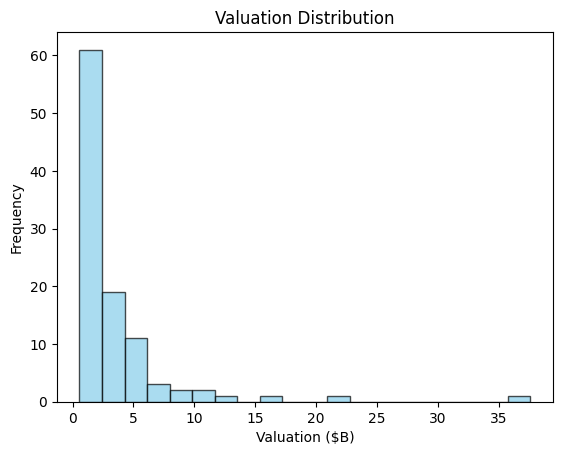

In [64]:
plt.hist(df['Valuation ($B)'],bins=20, alpha=0.7, color='Skyblue',edgecolor='black')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.title('Valuation Distribution')
plt.show()

**Key Insigth**

* Highly rigth-skewed distribution(few mega-unicorns)
* median valuations around 2-3B-FLIPKART dominates with 37.6B valuations
* Most unicorn clustered in $1-5B range

##Sector Analysis

###Sector Distribution

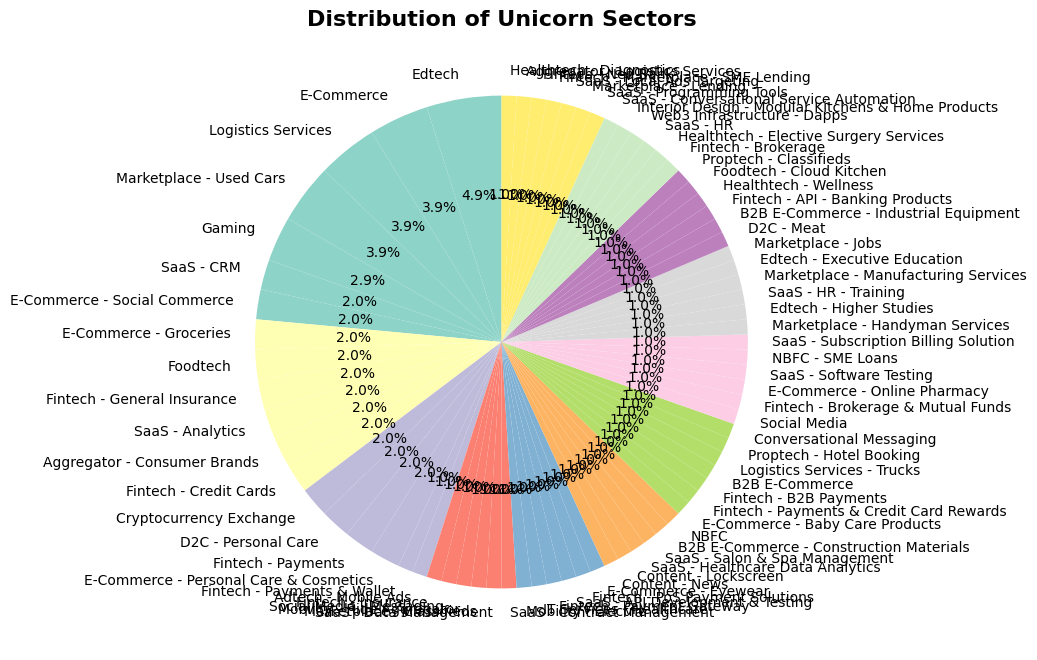

In [90]:
plt.figure(figsize=(12,8))

sector_counts=df['Sector'].value_counts()
colors=plt.cm.Set3(np.linspace(0,1,len(sector_counts)))

plt.pie(sector_counts.values,labels=sector_counts.index,autopct='%1.1f%%',colors=colors,startangle=90)
plt.title('Distribution of Unicorn Sectors',fontsize=16,fontweight='bold')
#plt.axis('equal')
plt.show()

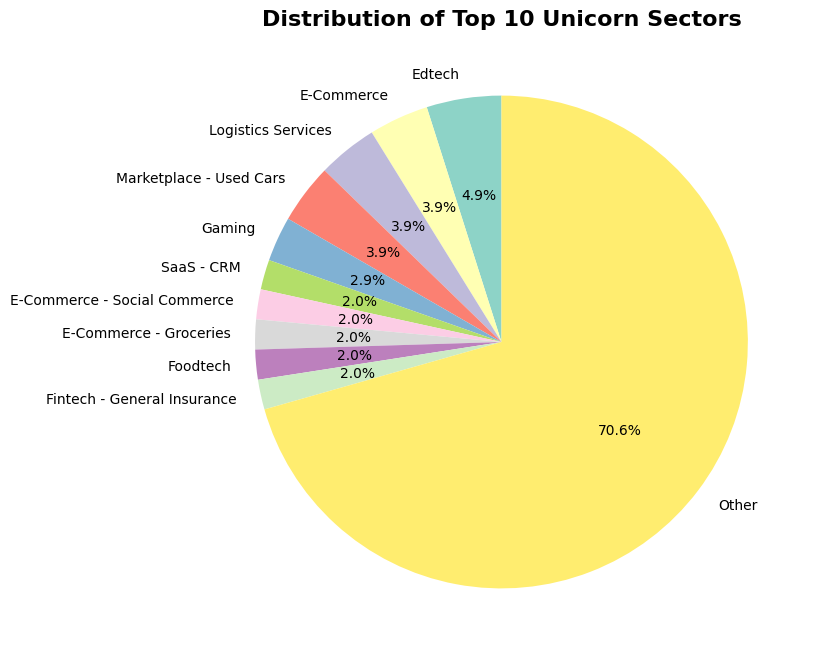

In [68]:
def display_top_k_sectors(df, k):
  sector_counts=df['Sector'].value_counts()

  #Select Top K sectors and group the rest as 'Other'
  if k < len(sector_counts):
    top_sectors = sector_counts.head(k)
    other_sectors = sector_counts.iloc[k:].sum()
    top_sectors['Other'] = other_sectors
  else:
    top_sectors = sector_counts

  plt.figure(figsize=(12,8))
  colors = plt.cm.Set3(np.linspace(0, 1, len(top_sectors)))

  plt.pie(top_sectors.values,labels=top_sectors.index,autopct='%1.1f%%',colors=colors,startangle=90)
  plt.title(f'Distribution of Top {k} Unicorn Sectors',fontsize=16,fontweight='bold')
  plt.axis=('equal')
  plt.show()

#Call the Functions K=5 to display top 5 sectors
display_top_k_sectors(df,10)


###Top Sectors By Bar Chart

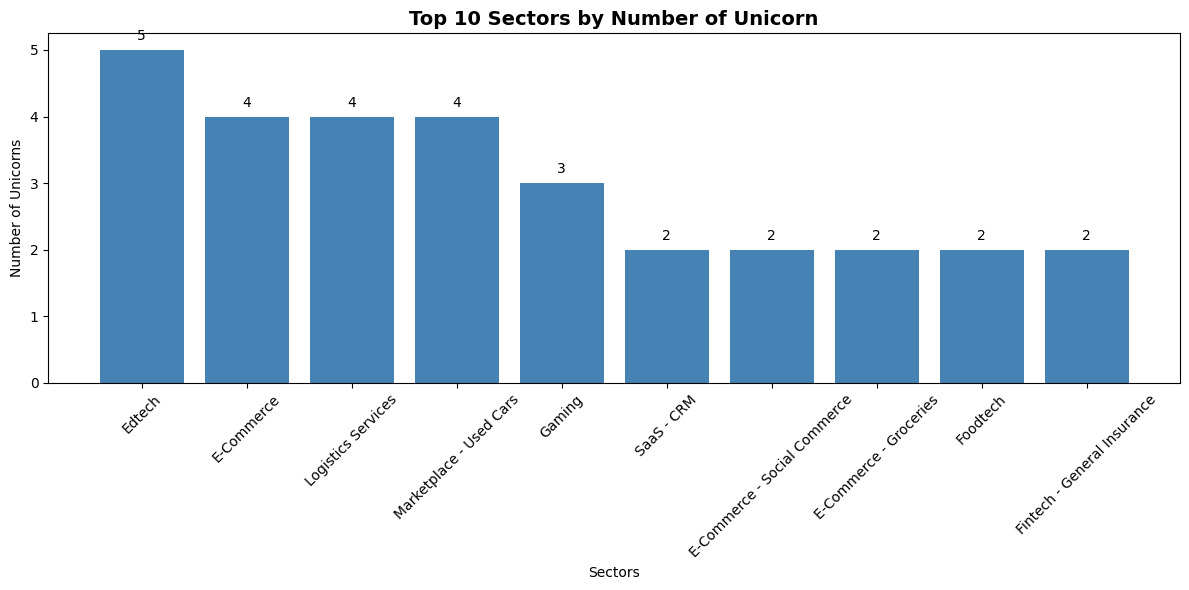

In [67]:
plt.figure(figsize=(12,6))
top_sectors = sector_counts.head(10)
bars = plt.bar(range(len(top_sectors)),top_sectors.values,color='steelblue')
plt.title('Top 10 Sectors by Number of Unicorn',fontsize=14,fontweight='bold')
plt.xlabel('Sectors')
plt.ylabel('Number of Unicorns')
plt.xticks(range(len(top_sectors)),top_sectors.index,rotation=45,ha='center')

#add value labels on bars
for bar,value in zip(bars,top_sectors.values):
  plt.text(bar.get_x() + bar.get_width()/2,bar.get_height() +0.1,
           str(value),ha='center',va='bottom')

plt.tight_layout()
plt.show()

**Key Insigths:**

* Edtech leads with highest number of unicorns
* E-Commerce and SaaS are major Contributions
* EdTech Emergence asa significant sector
* Diversification across multiple Sector

##**Geographics Distribution**

###City-Wise Distribution

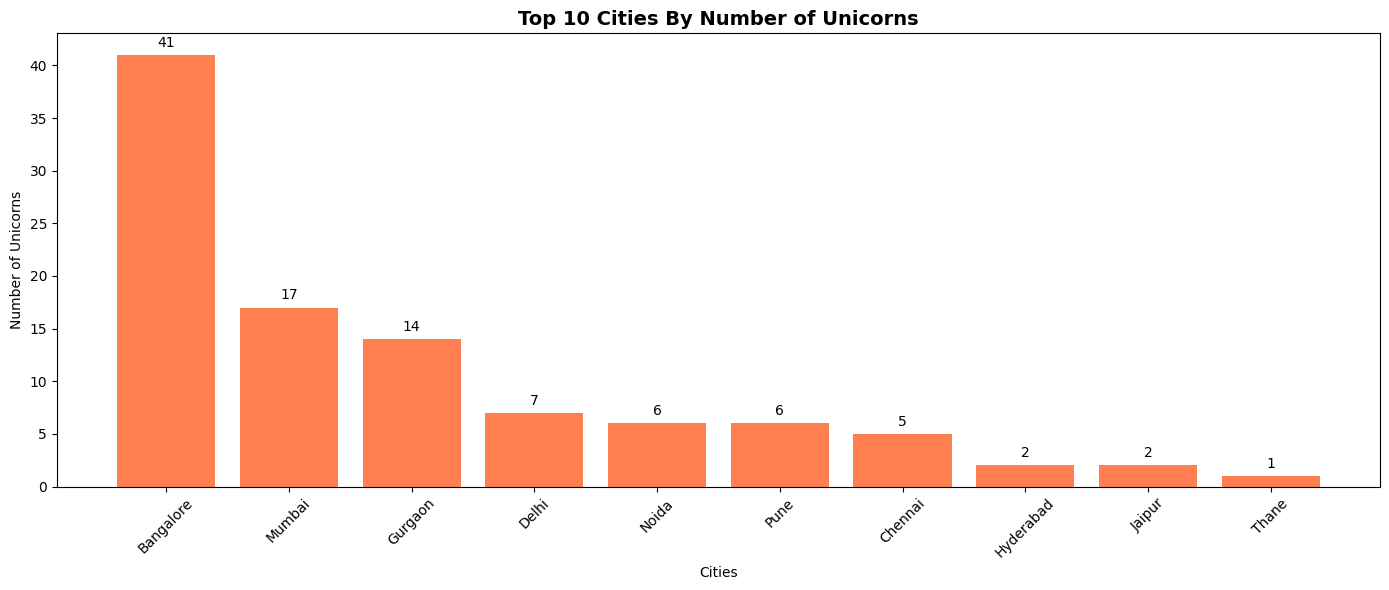

In [69]:
plt.figure(figsize=(14,6))

city_counts = df['Primary_City'].value_counts().head(10)
bars = plt.bar(city_counts.index,city_counts.values,color='coral')
plt.title('Top 10 Cities By Number of Unicorns',fontsize=14,fontweight='bold')
plt.xlabel('Cities')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45)

#add value labels on bars
for bar,value in zip(bars,city_counts.values):
  plt.text(bar.get_x() + bar.get_width()/2,bar.get_height() +0.5,
           str(value),ha='center',va='bottom')


plt.tight_layout()
plt.show()


###Create summary table

In [70]:
city_summary = df.groupby('Primary_City').agg({
    'Valuation ($B)' :['count','sum','mean'],
    'Entry_Year' : ['min','max']
}).round(2)
city_summary.columns = ['Count','Total Valuation','Avg_Valuation','First_Year','Last_Year']
city_summary.head(10)

,Count,Total Valuation,Avg_Valuation,First_Year,Last_Year
Primary_City,,,,,
Bangalore,41,185.20,4.52,2011,2022
Chennai,5,12.20,2.44,2018,2022
Delhi,7,15.53,2.22,2014,2022
Goa,1,1.53,1.53,2022,2022
Gurgaon,14,37.94,2.71,2015,2022
Hyderabad,2,2.50,1.25,2020,2022
Jaipur,2,2.90,1.45,2021,2022
Mumbai,17,42.80,2.52,2018,2022
Noida,6,30.90,5.15,2015,2022


**Key Insights**

* Banglore dominates with highest number of unicorns
* Mumbai and Gurgoan are other magor hubs
* Geographics concertration in tech cities
* Banglore leads in both count and Total valuation

##Temporal Analysic

###Entry Year Treads

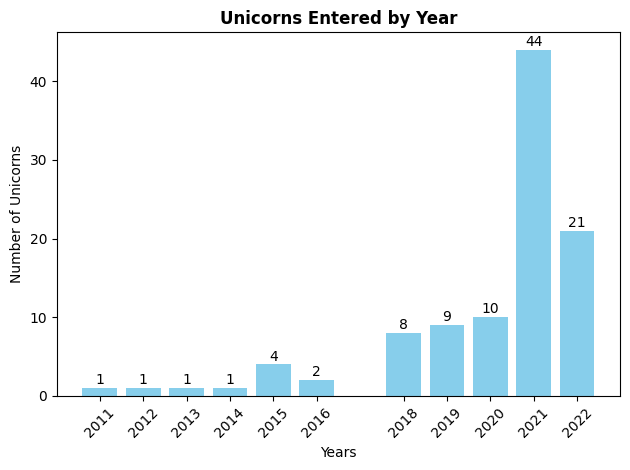

In [74]:
yearly_entries = df['Entry_Year'].value_counts().sort_index()
bars= plt.bar(yearly_entries.index,yearly_entries.values,color='skyblue')
plt.title('Unicorns Entered by Year',fontweight='bold')
plt.xlabel('Years')
plt.ylabel('Number of Unicorns')
plt.xticks(yearly_entries.index,rotation=45)

#add value labels
for bar,value in zip(bars,yearly_entries.values):
  plt.text(bar.get_x() + bar.get_width()/2,bar.get_height() +0.1,
           str(value),ha='center',va='bottom')


plt.tight_layout()
plt.show()

##Cumulative Unicorns


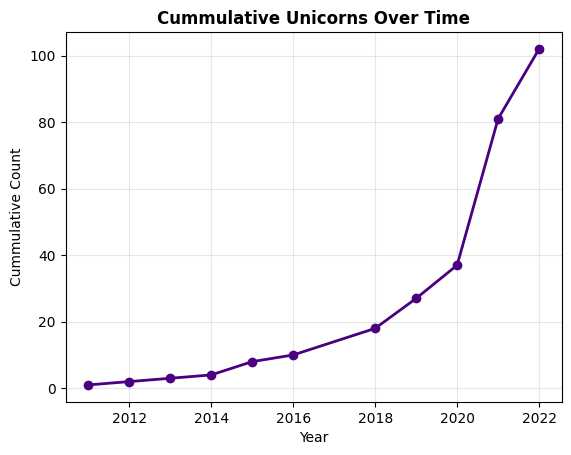

In [78]:
cummulative = yearly_entries.cumsum()
plt.plot(cummulative.index,cummulative.values,marker='o',linewidth=2,markersize=6,color='indigo')
plt.title('Cummulative Unicorns Over Time',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cummulative Count')
plt.grid(True,alpha=0.3)
plt.show()

###Avearge Valuation by years

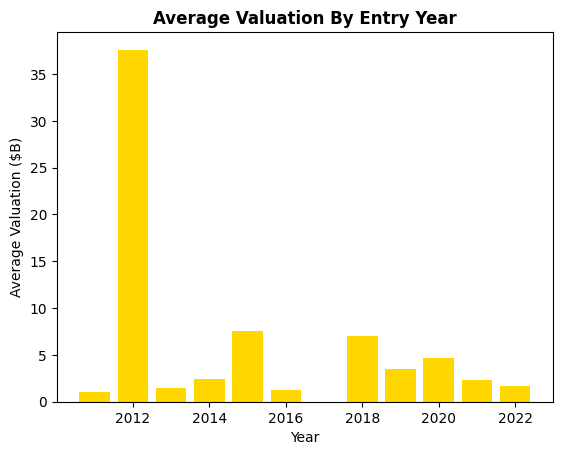

In [80]:
avg_val_by_year = df.groupby('Entry_Year')['Valuation ($B)'].mean()
plt.bar(avg_val_by_year.index,avg_val_by_year.values,color='gold')
plt.title('Average Valuation By Entry Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Valuation ($B)')
plt.show()

##Sector Evolution Over Time

In [92]:
def display_k_sector_evolution(df,k):
  #Group By Years and sector,Count Occurances
  sector_year = df.groupby(['Entry_Year','Sector']).size().unstack(fill_value=0)

  #Select top K sectors based on overall count
  top_k_sector_names = df['Sector'].value_counts().head(k).index.tolist()

  sector_year = sector_year[top_k_sector_names]

  plt.figure(figsize=(15,8))
  sector_year.plot(kind='bar',alpha=0.7,ax=plt.gca())

  plt.title(f'Evalutaion of top {k} Sectors Over Time',fontweight='bold')
  plt.xlabel('Year')
  plt.ylabel('Number of Unicorns')
  plt.yticks(range(0,sector_year.values.max()+5))
  plt.grid(True,alpha=0.3)
  plt.show()


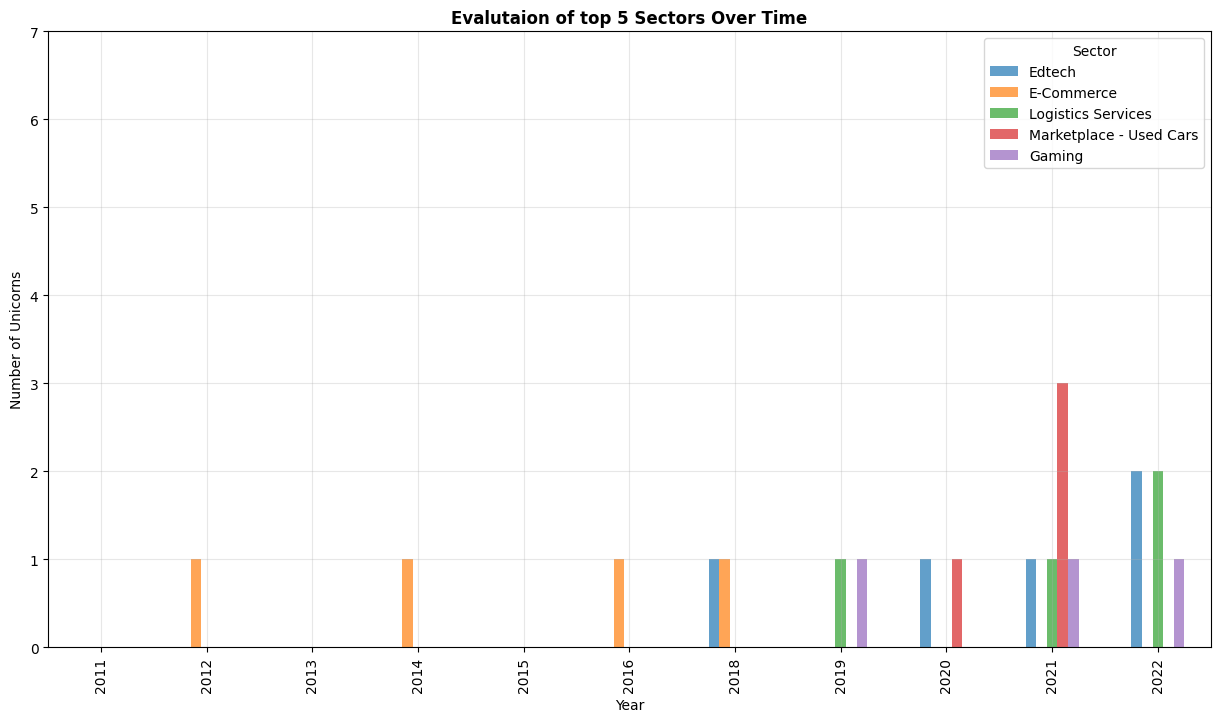

In [93]:
#Call the function with k=5
display_k_sector_evolution(df,5)